In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 5.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
os.chdir = ('/Users/zhouyu/Google Drive/python4work/')
%load_ext autoreload
%autoreload 2


### 1. Data Table Preparation
""
 responses/rotation angle
""

In [4]:
dataset = pd.read_csv("rotate_texture_epoch23-Mar-2017.csv")

In [5]:
dataset.head(5)

,id,splitOnRecType,displayMode,splitOnExperimentDate,rotation,celllabel,seed,splitOnDelTag,centerSigma,EpochNo,MeanResp
0,1,cell-attach,flash,2016/11/16,0,Cell1,1,keep,30,1,4.785205
1,2,cell-attach,flash,2016/11/16,0,Cell1,1,keep,30,2,0.235162
2,3,exc,flash,2016/11/16,0,Cell1,1,keep,30,1,-23.869963
3,4,inh,flash,2016/11/16,0,Cell1,1,keep,30,1,-27.251503
4,5,inh,flash,2016/11/16,0,Cell1,1,keep,30,2,-6.234014


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 11 columns):
id                       2127 non-null int64
splitOnRecType           2127 non-null object
displayMode              2127 non-null object
splitOnExperimentDate    2127 non-null object
rotation                 2127 non-null int64
celllabel                2127 non-null object
seed                     2127 non-null int64
splitOnDelTag            2127 non-null object
centerSigma              2127 non-null int64
EpochNo                  2127 non-null int64
MeanResp                 2127 non-null float64
dtypes: float64(1), int64(5), object(5)
memory usage: 182.9+ KB


In [7]:
dataset.columns

Index([u'id', u'splitOnRecType', u'displayMode', u'splitOnExperimentDate',
       u'rotation', u'celllabel', u'seed', u'splitOnDelTag', u'centerSigma',
       u'EpochNo', u'MeanResp'],
      dtype='object')

In [8]:
import scipy.io
rotation_images = scipy.io.loadmat('rotate_texture.mat')
print rotation_images.keys()

['rotationSig30Seed1', '__version__', 'rotationSig30Seed4', '__header__', '__globals__']


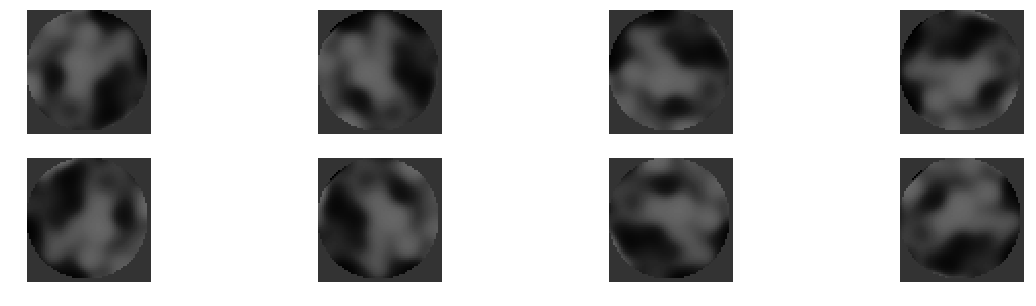

In [9]:
import matplotlib.pyplot as plt
displayset = rotation_images['rotationSig30Seed1']
num_pic = displayset.shape[0]
for i in xrange(num_pic):
    plt.subplot(2,4,i+1)
    plt.imshow((displayset[i,:,:]*255).astype('uint8'),cmap = 'gray',vmin = 0, vmax = 255)
    plt.axis('off')
plt.show()

### 2. Distribution of responses

In [10]:
# create (cell_id, seed, sigma, recording -mode) - > distribution (overall) versus particular angle
dataset['cell_id'] = dataset['splitOnExperimentDate']+dataset['celllabel']
grouped = dataset.groupby("cell_id")
print "name of cells recorded for texture rotation stimulus:"
print grouped.groups.keys()
print grouped.id.count()

name of cells recorded for texture rotation stimulus:
['2017/01/12Cell', '2016/11/16Cell2', '2016/11/29Cell1', '2016/11/22Cell2', '2017/02/28Cell', '2016/11/16Cell1', '2017/02/07Cell1', '2017/02/07Cell2']
cell_id
2016/11/16Cell1     96
2016/11/16Cell2     64
2016/11/22Cell2    224
2016/11/29Cell1    320
2017/01/12Cell     325
2017/02/07Cell1    160
2017/02/07Cell2    298
2017/02/28Cell     640
Name: id, dtype: int64


In [11]:
testDict = {} # a dictionary to hold results for testing
# keys: recording_mode, cell, sigma, seed

2017/01/12Cell


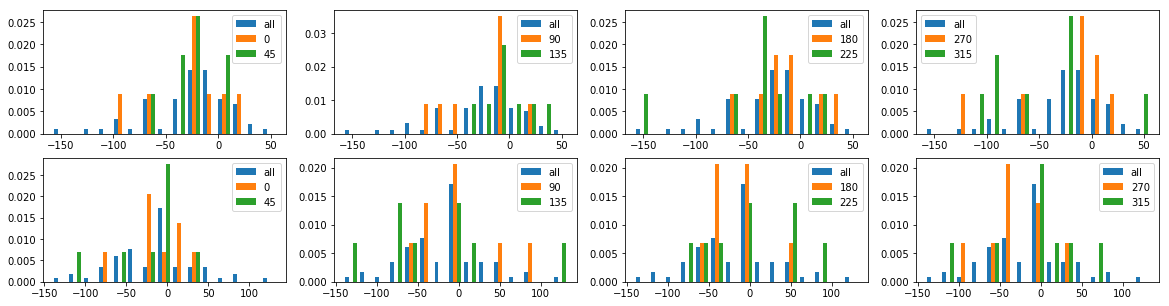

2016/11/16Cell2
2016/11/29Cell1


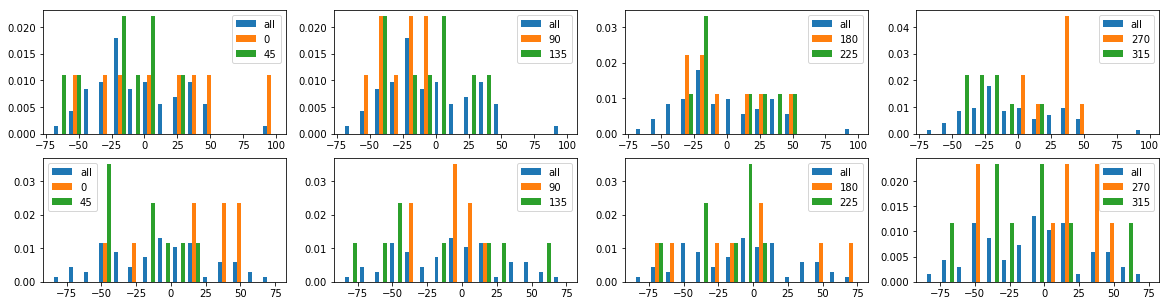

2016/11/22Cell2


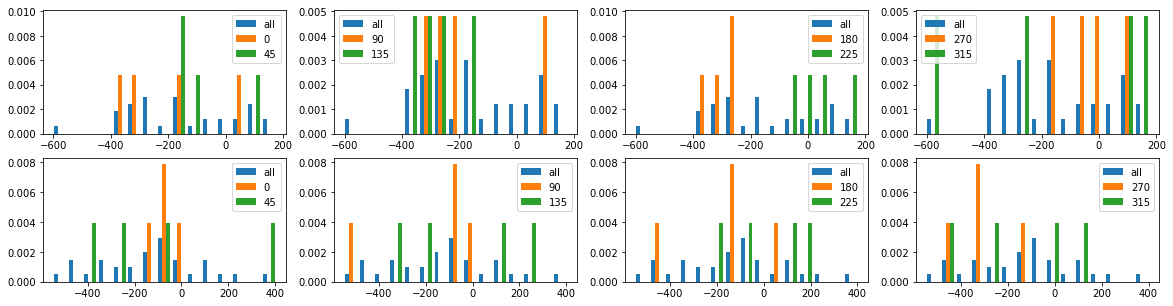

2017/02/28Cell


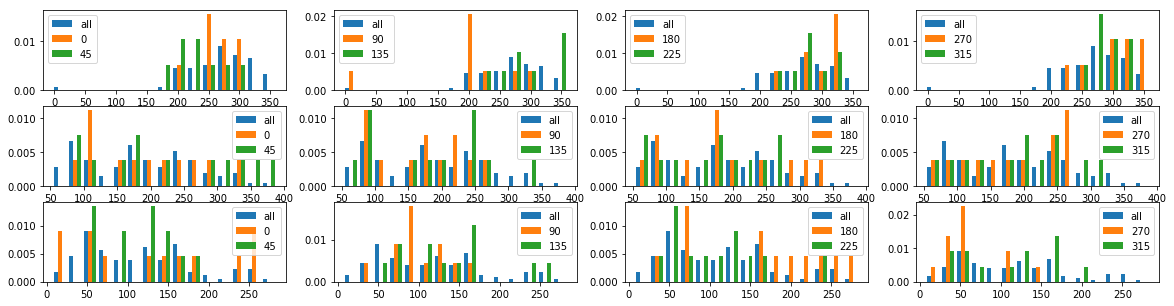

2016/11/16Cell1


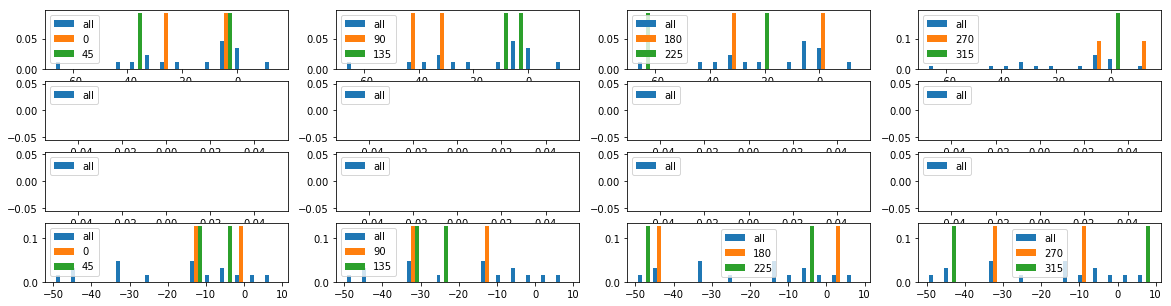

2017/02/07Cell1
2017/02/07Cell2


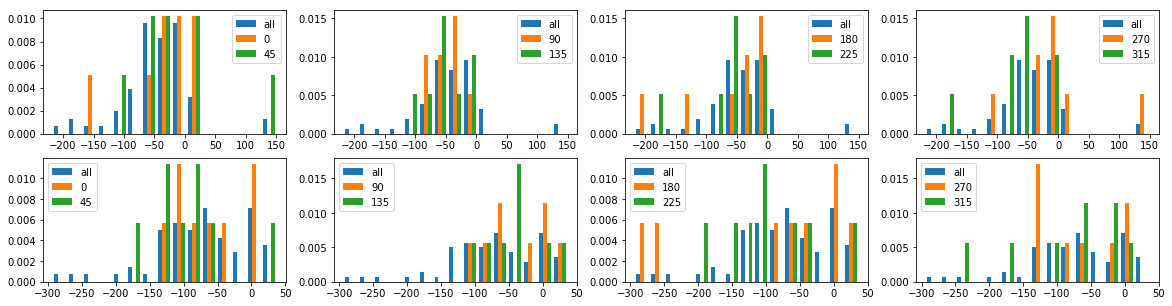

In [18]:
from IPython import display
#import time
#import seaborn as sns
from scipy import stats
cells = grouped.groups.keys()
ovp = 2 # distribution ploted 
nbins = 15
record_mode = 'inh'
for cell in cells:
    print cell
    tempdf = grouped.get_group(cell)
    tempdf = tempdf.loc[tempdf['splitOnRecType']==record_mode]
    sigmaCenter = tempdf.centerSigma.unique()
    seed = tempdf.seed.unique()
    rw = sigmaCenter.shape[0]*seed.shape[0]
    pos = 1;
    angles = tempdf.rotation.unique()
    col_sz = len(angles)/ovp
    for sigmaC in sigmaCenter:
        for sd in seed:
            angle_sub = []
            ova = tempdf.loc[(tempdf['centerSigma']==sigmaC) & (tempdf['seed']==sd)]
            all_resp = ova['MeanResp'].as_matrix()
            for i in xrange(col_sz):
                # plot overall distribution and post 2 angle distribution on top
                angle_ind = [x+i*2 for x in range(0,ovp)]
                angle_label = [str(angles[x]) for x in angle_ind]
                angle_label = ['all']+angle_label
                sub_resp = [(ova.loc[ova['rotation']== angles[x]])['MeanResp'].as_matrix()
                            for x in angle_ind]
                #plt.subplot(rw, col_sz, pos)
                # some code to plot over all distribution
                angle_sub = angle_sub+sub_resp
                resp = [all_resp]+sub_resp
                plt.subplot(rw,col_sz,pos)
                plt.hist(resp, nbins, normed=1,histtype='bar',label=angle_label)
                plt.legend()
                # some code to plot distribution of the two groups
                pos+=1
            key = (record_mode, cell, sigmaC, sd)
            testDict[key] = angle_sub
            #print stats.kruskal(*angle_sub)
    
    plt.show()

In [24]:
testDict.keys()

[('inh', '2017/01/12Cell', 30, 4),
 ('inh', '2017/02/07Cell2', 30, 4),
 ('exc', '2016/11/16Cell1', 40, 3),
 ('exc', '2017/02/07Cell2', 30, 1),
 ('inh', '2017/02/28Cell', 40, 1),
 ('inh', '2016/11/16Cell1', 30, 1),
 ('exc', '2016/11/16Cell1', 30, 1),
 ('inh', '2016/11/22Cell2', 30, 1),
 ('exc', '2016/11/16Cell1', 30, 2),
 ('inh', '2016/11/16Cell1', 40, 1),
 ('exc', '2016/11/22Cell2', 30, 1),
 ('inh', '2017/02/28Cell', 40, 4),
 ('inh', '2016/11/16Cell1', 40, 4),
 ('exc', '2016/11/29Cell1', 30, 4),
 ('exc', '2016/11/29Cell1', 30, 1),
 ('exc', '2016/11/16Cell1', 40, 4),
 ('inh', '2017/01/12Cell', 30, 1),
 ('exc', '2016/11/16Cell1', 40, 1),
 ('inh', '2017/02/07Cell2', 30, 1),
 ('inh', '2016/11/29Cell1', 30, 1),
 ('exc', '2017/01/12Cell', 30, 1),
 ('exc', '2017/02/07Cell2', 30, 4),
 ('inh', '2016/11/29Cell1', 30, 4),
 ('exc', '2017/02/28Cell', 40, 4),
 ('exc', '2017/02/28Cell', 40, 1),
 ('exc', '2016/11/16Cell1', 30, 3),
 ('exc', '2016/11/16Cell1', 30, 4),
 ('exc', '2016/11/22Cell2', 30, 4),

### 3. Statistic test to determine whether different rotational angles yield different responses
#### Kruskal-Wallis H-test (KWH)  - a non-parametric One-way Anova: same population median
#### One-way Anova (Anova): same population mean

In [25]:
res_df = pd.DataFrame(columns = ['Record_mode','Cell_ID','SigmaC','Seed','p_KWH','p_Anova'])

In [26]:
pos = 0
for cond in testDict:
    resp = testDict[cond]
    _,p_KWH = stats.kruskal(*resp)
    _,p_Anova = stats.f_oneway(*resp)
    rec = list(cond)+[p_KWH,p_Anova]
    res_df.loc[pos] = rec
    pos+=1

In [27]:
res_df = res_df.sort(columns = ['Cell_ID','Record_mode'])

/Users/zhouyu/Documents/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [28]:
res_df

,Record_mode,Cell_ID,SigmaC,Seed,p_KWH,p_Anova
2,exc,2016/11/16Cell1,40.0,3.0,NaN,NaN
6,exc,2016/11/16Cell1,30.0,1.0,0.428880,NaN
8,exc,2016/11/16Cell1,30.0,2.0,0.428880,NaN
15,exc,2016/11/16Cell1,40.0,4.0,0.431662,3.550274e-01
17,exc,2016/11/16Cell1,40.0,1.0,NaN,NaN
25,exc,2016/11/16Cell1,30.0,3.0,0.428880,NaN
26,exc,2016/11/16Cell1,30.0,4.0,NaN,NaN
28,exc,2016/11/16Cell1,40.0,2.0,NaN,NaN
5,inh,2016/11/16Cell1,30.0,1.0,0.203189,2.060612e-01
9,inh,2016/11/16Cell1,40.0,1.0,NaN,NaN


### 4. Exc, inh and Cell_Attach

In [18]:
grouped2 = dataset.groupby(['cell_id'])
print "name of cells recorded for texture rotation stimulus:"
print grouped2.groups.keys()
print grouped2.id.count()

name of cells recorded for texture rotation stimulus:
['2017/01/12Cell', '2016/11/16Cell2', '2016/11/29Cell1', '2016/11/22Cell2', '2017/02/28Cell', '2016/11/16Cell1', '2017/02/07Cell1', '2017/02/07Cell2']
cell_id
2016/11/16Cell1     96
2016/11/16Cell2     64
2016/11/22Cell2    224
2016/11/29Cell1    320
2017/01/12Cell     325
2017/02/07Cell1    160
2017/02/07Cell2    298
2017/02/28Cell     640
Name: id, dtype: int64


2017/01/12Cell


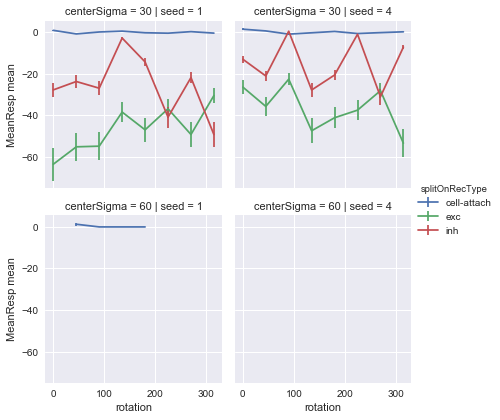

2016/11/16Cell2


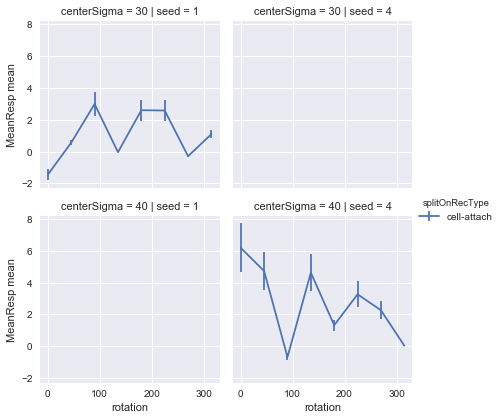

2016/11/29Cell1


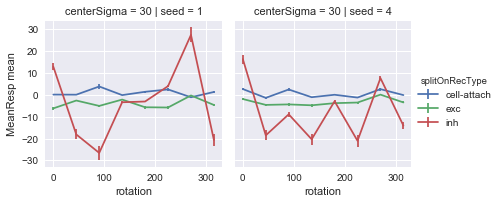

2016/11/22Cell2


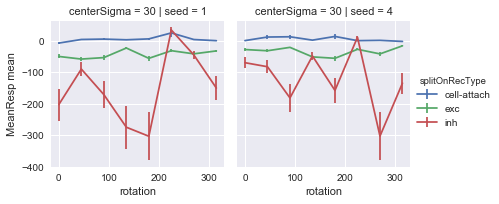

2017/02/28Cell


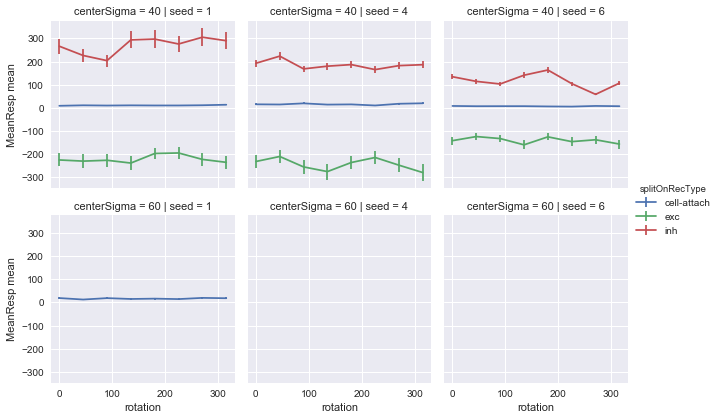

2016/11/16Cell1


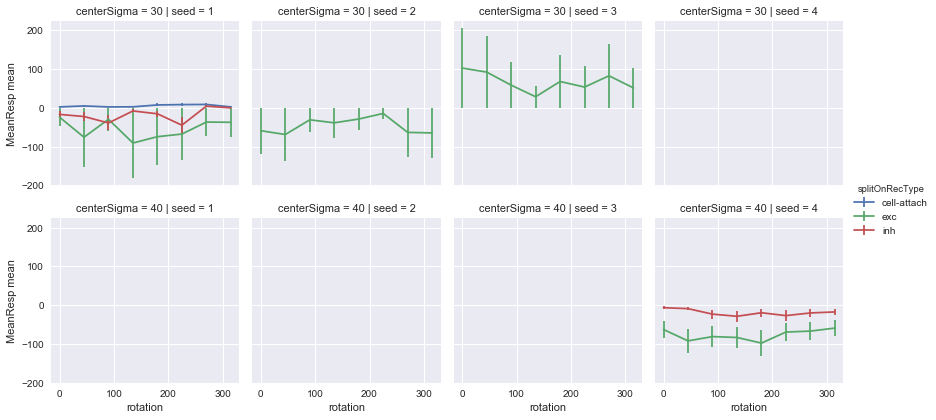

2017/02/07Cell1


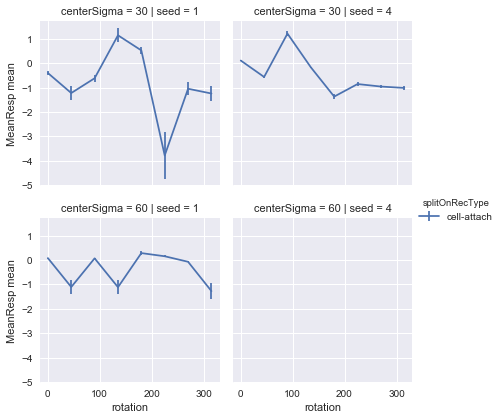

2017/02/07Cell2


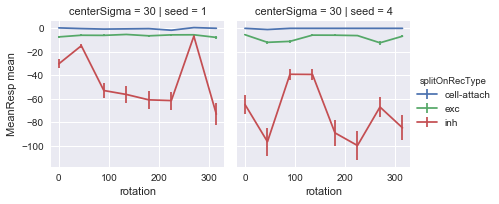

In [47]:
import seaborn as sns
import numpy as np
cells = grouped2.groups.keys()
cols = ['centerSigma','seed','splitOnRecType','rotation','MeanResp']
def SEM(x):
    if x.size == 0:
        return 0
    else:
        return np.mean(x)/x.size
for cell in cells:
    tempdf = grouped2.get_group(cell)
    print cell
    tempdf = tempdf[cols]
    sta_df = tempdf.groupby(['splitOnRecType','rotation','centerSigma','seed']).agg([np.mean,SEM])
    sta_df = sta_df.reset_index()
    sta_df.columns = [' '.join(col).strip() for col in sta_df.columns.values]
    g = sns.FacetGrid(sta_df, row="centerSigma",col="seed", hue = "splitOnRecType")
    g = (g.map(plt.errorbar,"rotation","MeanResp mean","MeanResp SEM").add_legend())# "MeanResp SEM")
    plt.show()